# 1D CNN

1D convolutional layers are commonly used in neural networks for processing sequential data, such as time series, audio signals, and text data.

Advantages of using a 1D convolutional layer:
1. Capturing local dependencies: One-dimensional convolutions can capture local dependencies in sequential data by sliding a filter over a sequence and computing a weighted sum of the neighboring values. This makes it possible to identify local patterns and features that are relevant to the task at hand.

2. Parameter sharing: Convolutional layers have a smaller number of parameters compared to fully connected layers, since the same filter is used at every position of the input. This allows the network to learn patterns that are invariant to the location of the pattern in the input sequence, leading to better generalization.

3. Handling variable-length inputs: 1D convolutions can handle variable-length inputs by using padding or truncating the input sequence. This is useful for tasks where the length of the input sequence can vary, such as speech recognition or natural language processing.

4. Computational efficiency: 1D convolutions are computationally efficient compared to other types of layers, such as recurrent layers, which can be slow to train due to the sequential nature of their computations.


In [8]:
# import libraries
import torch
#
import matplotlib.pyplot as plt
plt.rcParams['axes.grid'] = True
import numpy as np
import tensorflow as tf
import torch.nn as nn
import torch.optim as optim
import yfinance as yf
#
from keras.layers import Conv1D, Dense, Dropout, Flatten
from keras.models import Sequential
from sklearn.preprocessing import StandardScaler

In [9]:
# Load and preprocess the stock data
ticker = 'AAPL'
data = yf.download(ticker)
data = data['Adj Close'].pct_change()
data = data.dropna()
# data = np.loadtxt('stock_data.csv', delimiter=',')
# data = (data - np.mean(data)) / np.std(data)
# scaler for normalizing dataset
scaler = StandardScaler()
# Split the data into training and test sets
train_split = 0.8
train_size = int(len(data) * train_split)
train_set = scaler.fit_transform(data[:train_size].to_numpy().reshape(-1, 1))
test_set = scaler.transform(data.to_numpy().reshape(-1, 1))

[*********************100%***********************]  1 of 1 completed


In [10]:
# function for creating X and y
def create_xy(data, time_step=1):
    """
    This function creates the x data that should be used to predict y data.
    As we can see, time_step=1, which means that to predict y, we observe the last x value only.
    TODO: use different values of time_step>1 to see if it works and improves predictions.
    """
    X, y = [], []
    for i in range(len(data) - time_step):# - 1
        X.append(data[i:i + time_step])
        y.append(data[i + time_step])
    return np.array(X), np.array(y)

# Define the lookback window
lookback_window = 20
X_train, y_train = create_xy(train_set, lookback_window)
X_test, y_test = create_xy(test_set, lookback_window)

In [11]:
# Create the CNN model
model = Sequential()
# This layer applies the 1D convolution operation on the input sequence to extract relevant features:
# the convolutional layer has 64 filters, which means that it will produce 64 output channels
# filters are 3 units wide, the kernel size determines the receptive field of each filter
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(lookback_window, 1)))
# prevent overfitting:
model.add(Dropout(0.1))
# This layer flattens the output of the previous layer into a 1D vector. 
# This prepares the output for input to a fully connected layer.
model.add(Flatten())
# This layer is a fully connected (Dense) layer with a single neuron that produces the final output.
# This layer learns to map the extracted features from the convolutional layer to the final output value.
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
epochs=100
batch_size=32
history = model.fit(X_train.reshape((X_train.shape[0], X_train.shape[1], 1)), y_train, 
                    epochs=epochs, batch_size=batch_size, 
                    validation_data=(X_test[train_size:].reshape((X_test[train_size:].shape[0], X_test[train_size:].shape[1], 1)), y_test[train_size:]))


Epoch 1/100
266/266 [==============================] - 1s 2ms/step - loss: 1.0197 - val_loss: 0.3917
Epoch 2/100
266/266 [==============================] - 0s 2ms/step - loss: 1.0056 - val_loss: 0.3928
Epoch 3/100
266/266 [==============================] - 0s 1ms/step - loss: 0.9977 - val_loss: 0.3950
Epoch 4/100
266/266 [==============================] - 0s 1ms/step - loss: 0.9932 - val_loss: 0.3930
Epoch 5/100
266/266 [==============================] - 0s 2ms/step - loss: 0.9937 - val_loss: 0.3921
Epoch 6/100
266/266 [==============================] - 0s 1ms/step - loss: 0.9910 - val_loss: 0.3939
Epoch 7/100
266/266 [==============================] - 1s 2ms/step - loss: 0.9900 - val_loss: 0.3911
Epoch 8/100
266/266 [==============================] - 0s 2ms/step - loss: 0.9870 - val_loss: 0.3910
Epoch 9/100
266/266 [==============================] - 0s 1ms/step - loss: 0.9860 - val_loss: 0.3933
Epoch 10/100
266/266 [==============================] - 0s 1ms/step - loss: 0.9867 - val_lo

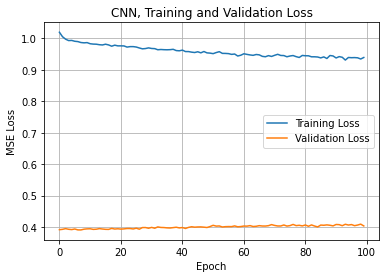

In [12]:
# plot the training and validation loss by epoch
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN, Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()

333/333 [==============================] - 0s 1ms/step - loss: 0.8128


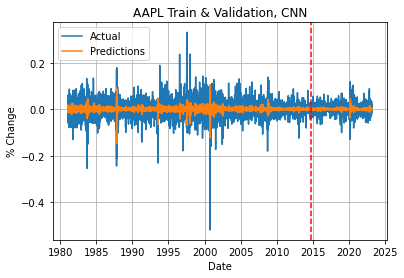

In [13]:
# Evaluate the model
mse = model.evaluate(X_test.reshape((X_test.shape[0], X_test.shape[1], 1)), y_test)

# Make predictions
predictions = model.predict(X_test.reshape((X_test.shape[0], X_test.shape[1], 1)))
predictions = scaler.inverse_transform(predictions).reshape(-1)
y_test = scaler.inverse_transform(y_test).reshape(-1)

# Plot the actual data and the predictions
plt.plot(data.index[lookback_window:], y_test, label='Actual')
plt.plot(data.index[lookback_window:], predictions, label='Predictions')
plt.legend()
plt.axvline(x=data.index[train_size], c='r', linestyle='--')
plt.title(f'{ticker} Train & Validation, CNN')
plt.xlabel('Date')
plt.ylabel('% Change')
plt.show()

# Transformers

Convolutional Neural Networks (CNNs) and Transformers use different methods to capture local and global dependencies in sequential data.

In CNNs, local dependencies are captured using convolutional layers that slide a filter over a sequence and compute a weighted sum of neighboring values. This allows the network to identify local patterns and features that are relevant to the task at hand. For example, in a time series forecasting task, a CNN might identify local patterns in the time series data, such as seasonal trends or sudden changes in the data.

In contrast, Transformers use self-attention mechanisms to capture both local and global dependencies in the data. Self-attention computes a weighted sum of all input values, allowing the network to capture global dependencies between all elements in the sequence. This means that a Transformer can identify relationships between distant elements in the sequence that a CNN might miss. For example, in a language translation task, a Transformer might identify global dependencies between words that are far apart in the source language, allowing it to produce more accurate translations.

Overall, the main difference between CNNs and Transformers is the way they capture global dependencies in the data. While CNNs are designed to identify local patterns and features, Transformers are designed to capture both local and global relationships between elements in the sequence. However, CNNs remain useful for tasks that require the identification of local patterns and features, while Transformers are more suited to tasks that require the modeling of complex relationships between distant elements in the sequence.


In [14]:
# Define the Transformer model
class TransformerModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers, num_heads, dropout):
        super(TransformerModel, self).__init__()
        
        # Define the embedding layer
        self.embedding = nn.Linear(input_size, hidden_size).float() # set the weight matrix to float
        
        # Define the transformer encoder layer
        encoder_layer = nn.TransformerEncoderLayer(d_model=hidden_size, nhead=num_heads, dropout=dropout)
        # The output of the encoder is a sequence of hidden vectors that contain learned representations of the input sequence.
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        
        # Define the output layer
        # we add a dense output layer that maps the final hidden state of the transformer to a single output value.
        self.out = nn.Linear(hidden_size, output_size).float() # set the weight matrix to float
        
    def forward(self, x):
        # Apply the embedding layer
        x = self.embedding(x)
        
        # Reshape the tensor to fit the input shape expected by the transformer encoder
        # print(x.size())
        x = x.squeeze(2)  # Remove the third dimension (1) from the tensor
        batch_size, seq_len, emb_size = x.size()
        x = x.permute(1, 0, 2)
    
        # Pass the input tensor through the transformer encoder
        x = self.transformer_encoder(x)
    
        # Reshape the tensor to fit the input shape expected by the output layer
        x = x.permute(1, 0, 2)
        # Use only the last output from the transformer
        x = x[:, -1, :]
        
        # Pass the output through the output layer
        x = self.out(x)
    
        return x

In [15]:
# Define the hyperparameters
epochs=20
input_size = 1
# The d_model parameter sets the hidden dimension size of the transformer, which is analogous to the number of filters in a convolutional layer.
hidden_size = 64
output_size = 1
num_layers = 1
# This controls the number of parallel self-attention heads that the transformer uses to attend to different parts of the input sequence. 
num_heads = 4
# Prevent overfitting.
dropout = 0.1

# Create the model and optimizer
model = TransformerModel(input_size, hidden_size, output_size, num_layers, num_heads, dropout)
optimizer = optim.Adam(model.parameters())

# Define the loss function
criterion = nn.MSELoss()

In [16]:
# Convert input data to Float type
X_train = torch.FloatTensor(X_train)
y_train = torch.FloatTensor(y_train)
X_test = torch.FloatTensor(X_test)
y_test = torch.FloatTensor(y_test)

train_losses = []
test_losses = []

# Train the model
for epoch in range(epochs):
    running_loss = 0.0
    for i in range(0, len(X_train), batch_size):
        # Get the batch of data
        inputs = X_train[i:i+batch_size].unsqueeze(2)
        targets = y_train[i:i+batch_size]#.unsqueeze(1)
        
        # Zero the parameter gradients
        optimizer.zero_grad()
        
        # Forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        #  compute the gradients of all model parameters that contributed to the current loss value
        loss.backward()
        # These gradients are then used by the optimizer to update the parameters:
        optimizer.step()
        
        running_loss += loss.item()
    
    # Print the average loss for this epoch
    print('Epoch [%d], Loss: %.4f' % (epoch+1, running_loss / len(X_train)))
    train_losses.append(running_loss / len(X_train))
    
    # Evaluate the model on the test set
    with torch.no_grad():
        inputs = X_test[train_size:].unsqueeze(2)
        targets = y_test[train_size:].unsqueeze(1)
        outputs = model(inputs)
        test_loss = criterion(outputs, targets)
        print('Test Loss: %.4f' % test_loss.item())
        test_losses.append(test_loss.item())

Epoch [1], Loss: 0.0319
Test Loss: 0.0040
Epoch [2], Loss: 0.0314
Test Loss: 0.0011
Epoch [3], Loss: 0.0313
Test Loss: 0.0010
Epoch [4], Loss: 0.0313
Test Loss: 0.0015
Epoch [5], Loss: 0.0313
Test Loss: 0.0017
Epoch [6], Loss: 0.0313
Test Loss: 0.0011
Epoch [7], Loss: 0.0313
Test Loss: 0.0009
Epoch [8], Loss: 0.0312
Test Loss: 0.0009
Epoch [9], Loss: 0.0312
Test Loss: 0.0009
Epoch [10], Loss: 0.0312
Test Loss: 0.0007
Epoch [11], Loss: 0.0312
Test Loss: 0.0009
Epoch [12], Loss: 0.0312
Test Loss: 0.0008
Epoch [13], Loss: 0.0312
Test Loss: 0.0007
Epoch [14], Loss: 0.0312
Test Loss: 0.0007
Epoch [15], Loss: 0.0312
Test Loss: 0.0007
Epoch [16], Loss: 0.0312
Test Loss: 0.0010
Epoch [17], Loss: 0.0312
Test Loss: 0.0007
Epoch [18], Loss: 0.0312
Test Loss: 0.0006
Epoch [19], Loss: 0.0312
Test Loss: 0.0006
Epoch [20], Loss: 0.0312
Test Loss: 0.0004


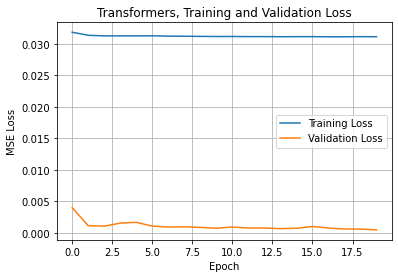

In [17]:
# plot the training and validation loss by epoch
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Validation Loss')
plt.title('Transformers, Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()

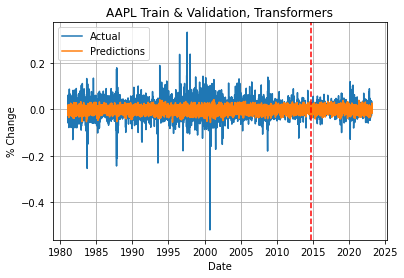

In [18]:
with torch.no_grad():
    inputs = X_test.unsqueeze(2)
    targets = y_test.unsqueeze(1)
    outputs = model(inputs)
# Plot the actual data and the predictions
plt.plot(data.index[lookback_window:], y_test, label='Actual')
plt.plot(data.index[lookback_window:], outputs.squeeze(1), label='Predictions')
plt.legend()
plt.axvline(x=data.index[train_size], c='r', linestyle='--')
plt.title(f'{ticker} Train & Validation, Transformers')
plt.xlabel('Date')
plt.ylabel('% Change')
plt.show()